# Import libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', None)  #infinite column width
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score



import warnings  
warnings.filterwarnings('ignore')

# Read data

In [2]:
df = pd.read_csv(r"../input/bookcrossing-dataset/Books Data with Category Language and Summary/Preprocessed_data.csv", encoding="latin-1")
df.head()

,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg,"Provides an introduction to classical myths placing the addressed\ntopics within their historical context, discussion of archaeological\nevidence as support for mythical events, and how these themes have\nbeen portrayed in literature, art, ...",en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,"In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.",en,['Actresses'],timmins,ontario,canada
2,2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,"In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.",en,['Actresses'],ottawa,ontario,canada
3,3,11676,"n/a, n/a, n/a",34.7439,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,"In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.",en,['Actresses'],NaN,NaN,NaN
4,4,41385,"sudbury, ontario, canada",34.7439,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,"In a small town in Canada, Clara Callan reluctantly takes leave of her\nsister, Nora, who is bound for New York.",en,['Actresses'],sudbury,ontario,canada


In [3]:
df.shape

(1031175, 19)

In [4]:
#drop irrelevant features
drop_list = ['location', 'age', 'year_of_publication', 'publisher', 'img_s', 'img_m', 'img_l', 'city', 'state', 'country', 'Unnamed: 0']
df = df.drop(drop_list,axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031175 entries, 0 to 1031174
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   user_id      1031175 non-null  int64 
 1   isbn         1031175 non-null  object
 2   rating       1031175 non-null  int64 
 3   book_title   1031175 non-null  object
 4   book_author  1031174 non-null  object
 5   Summary      1031175 non-null  object
 6   Language     1031175 non-null  object
 7   Category     1031175 non-null  object
dtypes: int64(2), object(6)
memory usage: 62.9+ MB


# Deal with Nulls and duplicates

In [6]:
df.drop_duplicates(inplace=True)

There is just one null entry for author

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

user_id        0
isbn           0
rating         0
book_title     0
book_author    0
Summary        0
Language       0
Category       0
dtype: int64

In [9]:
print(f"There are {df['isbn'].nunique()} books")
print(f"There are {df['book_author'].nunique()} book authors")
print(f"There are {df['user_id'].nunique()} users")
print(f"There are {df['Category'].nunique()} Categories")

There are 270169 books
There are 101593 book authors
There are 92107 users
There are 6448 Categories


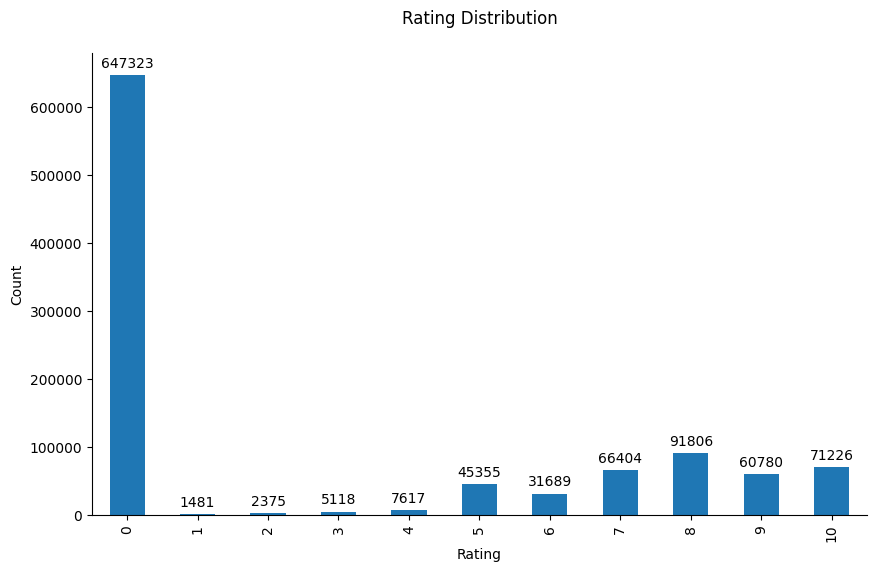

In [10]:
plt.figure(figsize=(10,6))
plt.rc("font", size=10)
ratings_counts = df["rating"].value_counts(sort=False).sort_index()

# Plot the bar chart
ax = ratings_counts.plot(kind='bar')

# Add titles and labels
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')

# Add labels to each bar, position them above
ax.bar_label(ax.containers[0], label_type='edge', padding=3, fontsize=10)

# Remove left and upper box borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Display the plot
plt.show()

# Collaborative Filtering Using k-Nearest Neighbors (kNN)

In [11]:
columns = ['Category', 'book_author', 'Summary', 'isbn','Language']
CF_df = df.drop(columns, axis=1)
CF_df.head()

,user_id,rating,book_title
0,2,0,Classical Mythology
1,8,5,Clara Callan
2,11400,0,Clara Callan
3,11676,8,Clara Callan
4,41385,0,Clara Callan


In [12]:
CF_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1031174 entries, 0 to 1031174
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   user_id     1031174 non-null  int64 
 1   rating      1031174 non-null  int64 
 2   book_title  1031174 non-null  object
dtypes: int64(2), object(1)
memory usage: 31.5+ MB


In [13]:
# To ensure storage efficiency
CF_df['user_id'] = pd.to_numeric(CF_df['user_id'], downcast='integer')
CF_df['rating'] = pd.to_numeric(CF_df['rating'], downcast='integer')

In [14]:
num_ratings = CF_df.shape[0]  # Total number of ratings
num_users = CF_df['user_id'].nunique()  # Unique users
num_items = CF_df['book_title'].nunique()  # Unique items (books)

sparsity = 1 - (num_ratings / (num_users * num_items))
print(f'Sparsity: {sparsity * 100:.2f}%')

Sparsity: 100.00%


# To ensure significance we will achieve a sparsity of 0.95

In [15]:
# First get test Data

counts_u = CF_df['user_id'].value_counts()
counts_r = CF_df['book_title'].value_counts()
    
# Filter for users in the range of 50 to 90
filtered_users = counts_u[(counts_u >= 50) & (counts_u < 90)].index

# Filter for books in the range of 50 to 90
filtered_books = counts_r[(counts_r >= 50) & (counts_r < 90)].index

# Apply these filters to CF_df
test_df = CF_df[CF_df['user_id'].isin(filtered_users) & CF_df['book_title'].isin(filtered_books)]

# Drop duplicates
test_df = test_df.drop_duplicates(['user_id', 'book_title'])

In [16]:
# Define the range of thresholds
thresholds = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Store results
results = []

# Iterate over thresholds
for threshold in thresholds:
    # Filter users and items based on the same threshold
    counts_u = CF_df['user_id'].value_counts()
    counts_r = CF_df['book_title'].value_counts()
    
    filtered_users = counts_u[counts_u >= threshold].index
    filtered_items = counts_r[counts_r >= threshold].index
    
    CF_df_filtered = CF_df[CF_df['user_id'].isin(filtered_users)]
    CF_df_filtered = CF_df_filtered[CF_df_filtered['book_title'].isin(filtered_items)]
    
    # Compute sparsity
    num_ratings = CF_df_filtered.shape[0]
    num_users = CF_df_filtered['user_id'].nunique()
    num_items = CF_df_filtered['book_title'].nunique()
    
    sparsity = 1 - (num_ratings / (num_users * num_items))
    
    # Store the result
    results.append({
        'Threshold': threshold,
        'Sparsity': sparsity
    })
    
    # Break if sparsity is less than 0.95
    if sparsity < 0.95:
        break

# Convert results to DataFrame and find the minimum sparsity
results_df = pd.DataFrame(results)
min_sparsity_row = results_df.loc[results_df['Sparsity'].idxmin()]

print("Results:")
print(results_df)

print("\nMinimum Sparsity:")
print(min_sparsity_row)


Results:
   Threshold  Sparsity
0         10  0.997676
1         20  0.993460
2         30  0.988392
3         40  0.982616
4         50  0.976367
5         60  0.970036
6         70  0.963122
7         80  0.955881
8         90  0.948818

Minimum Sparsity:
Threshold    90.000000
Sparsity      0.948818
Name: 8, dtype: float64


In [17]:
CF_df = CF_df[CF_df['user_id'].isin(counts_u[counts_u >= results[-1].get('Threshold')].index)]
CF_df = CF_df[CF_df['book_title'].isin(counts_r[counts_r >= results[-1].get('Threshold')].index)]

In [18]:
CF_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99803 entries, 31 to 1029894
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     99803 non-null  int32 
 1   rating      99803 non-null  int8  
 2   book_title  99803 non-null  object
dtypes: int32(1), int8(1), object(1)
memory usage: 2.0+ MB


In [19]:
print(f"There are {CF_df['book_title'].nunique()} books")
print(f"There are {CF_df['user_id'].nunique()} users")

There are 1072 books
There are 1819 users


In [20]:
# Drop duplicates
CF_df = CF_df.drop_duplicates(['user_id', 'book_title'])

# Create pivot table for the entire dataset
CF_df_pivot = CF_df.pivot(index='book_title', columns='user_id', values='rating').fillna(0)

# Convert pivot table to sparse matrix
CF_df_matrix = csr_matrix(CF_df_pivot.values)

# Fit the KNN model on the entire matrix
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(CF_df_matrix)

print("Model training complete.")

# Function to recommend books
def recommend_books(book_title, n_neighbors=6):
    if book_title not in CF_df_pivot.index:
        print(f'Book "{book_title}" not found in the dataset.')
        return
    
    # Get the index of the book
    query_index = CF_df_pivot.index.get_loc(book_title)
    
    # Get the nearest neighbors
    query_book_data = CF_df_pivot.iloc[query_index, :].values.reshape(1, -1)
    distances, indices = model_knn.kneighbors(query_book_data, n_neighbors=n_neighbors)
    
    # Display recommendations
    print(f'Recommendations for "{book_title}":\n')
    for i in range(1, len(distances.flatten())):
        recommended_index = indices.flatten()[i]
        recommended_book = CF_df_pivot.index[recommended_index]
        print(f'{i}: "{recommended_book}", with distance of {distances.flatten()[i]:.4f}')

Model training complete.


In [21]:
# Example usage
recommend_books("The Da Vinci Code")

Recommendations for "The Da Vinci Code":

1: "Angels & Demons", with distance of 0.7242
2: "The Blue Nowhere : A Novel", with distance of 0.8106
3: "Middlesex: A Novel", with distance of 0.8113
4: "Deception Point", with distance of 0.8143
5: "The Lovely Bones: A Novel", with distance of 0.8193


# Evaluation

In [39]:
# Create pivot table for the test set
test_df_pivot = test_df.pivot(index='book_title', columns='user_id', values='rating').fillna(0)

# Ensure the test pivot table columns match the training pivot table columns
test_df_pivot = test_df_pivot.reindex(columns=CF_df_pivot.columns, fill_value=0)

# Convert test pivot table to sparse matrix
test_matrix = csr_matrix(test_df_pivot.values)

# Function to predict ratings
def predict_ratings(model_knn, test_matrix, train_pivot):
    predictions = np.zeros(test_matrix.shape)
    
    for i in range(test_matrix.shape[0]):
        test_row = test_matrix[i, :].toarray()
        
        # Find the nearest neighbors for this test row
        distances, indices = model_knn.kneighbors(test_row, n_neighbors=6)
        
        # Compute the average ratings from neighbors
        neighbor_ratings = np.mean(train_pivot.values[indices.flatten(), :], axis=0)
        predictions[i, :] = neighbor_ratings
    
    return predictions

# Predict ratings
predicted_ratings = predict_ratings(model_knn, test_matrix, CF_df_pivot)
true_ratings = test_matrix.toarray()  # True ratings matrix

# Calculate MAE and RMSE
mae = mean_absolute_error(true_ratings, predicted_ratings)
rmse = np.sqrt(mean_squared_error(true_ratings, predicted_ratings))

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

MAE: 0.1218
RMSE: 0.4415


# Content Based

In [23]:
df['Summary'].value_counts()

Summary
9                                                                                                                                                                                                                                           398936
Wild animus is a search for the primordial, a test of human\nfoundations and a journey to the breaking point.                                                                                                                                 2502
Harvard symbologist Robert Langdon and French cryptologist Sophie\nNeveu work to solve the murder of an elderly curator of the Louvre, a\ncase which leads to clues hidden in the works of Da Vinci and a\ncenturies-old secret society.       892
A NOVEL ABOUT THE COMPLEX BONDS BETWEEN A MOTHER AND A DAUGHTER.                                                                                                                                                                               732
Told in Dinah&#39;s 

# Removing movies with no summaries

In [24]:
CB_df = df[df['Summary'] != '9']

In [25]:
CB_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 632238 entries, 0 to 1031173
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      632238 non-null  int64 
 1   isbn         632238 non-null  object
 2   rating       632238 non-null  int64 
 3   book_title   632238 non-null  object
 4   book_author  632238 non-null  object
 5   Summary      632238 non-null  object
 6   Language     632238 non-null  object
 7   Category     632238 non-null  object
dtypes: int64(2), object(6)
memory usage: 43.4+ MB


In [26]:
CB_df = CB_df.groupby(['book_title', 'Summary', 'book_author', 'Category'], as_index=False)['rating'].mean()
CB_df['book_title'].drop_duplicates(inplace=True)
CB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140793 entries, 0 to 140792
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   book_title   140793 non-null  object 
 1   Summary      140793 non-null  object 
 2   book_author  140793 non-null  object 
 3   Category     140793 non-null  object 
 4   rating       140793 non-null  float64
dtypes: float64(1), object(4)
memory usage: 5.4+ MB


In [27]:
CB_df.head(5)

,book_title,Summary,book_author,Category,rating
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)","Captures the emotions of a young Union girl who struggles to make\nsense of her shattered world as she lives in a state of harsh division\nduring the first year of the Civil War. 120,000 first printing.",Karen Hesse,['Juvenile Fiction'],2.25
1,"Ask Lily (Young Women of Faith: Lily Series, Book 5)","When Lily enters the seventh grade, she starts writing an advice\ncolumn for the school paper and no longer has as much time for her\nfriends, but when something goes wrong due to her column, she learns\nthat only God has all the answers.",Nancy N. Rue,['Juvenile Fiction'],8.00
2,Beyond IBM: Leadership Marketing and Finance for the 1990s,"Some of the world&#39;s most successful entrepreneurs have\nenthusiastically endorsed it. And now, Beyond IBM is available to\ndeliver the keys to leadership, marketing, and finance for now and for\nthe information age ahead.",Lou Mobley,['Business & Economics'],0.00
3,Clifford Visita El Hospital (Clifford El Gran Perro Colorado),"Clifford acompa a a Emily Elizabeth a visitar a su abuelita en el\nhospital, pero su amor por las galletas lo lleva a esconderse en la\ncesta de galletas de la abuelita.",Norman Bridwell,['Juvenile Fiction'],0.00
4,Dark Justice,"An attempt on the life of the U.S. president during a visit to\nManhattan is the first step in a plot involving the recruitment of a\nnetwork of terrorists, and it is up to Blake Johnson and Sean Dillon\nto uncover the mastermind behind it all ...",Jack Higgins,['Fiction'],10.00


In [28]:
# Combine features into a single string for each book
CB_df['combined_features'] = CB_df['Summary'] + ' ' + CB_df['Category'] + ' ' + CB_df['book_author']

# Create the TF-IDF matrix using the combined features
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(CB_df['combined_features'])

# Construct a reverse map of indices and book titles
indices = pd.Series(CB_df.index, index=CB_df['book_title']).drop_duplicates()

# Recommendation function with dynamic cosine similarity computation
def get_recommendations(book_title, tfidf_matrix, indices, chunk_size=1000, n_recommendations=5):
    # Get the index of the book that matches the title
    if book_title not in indices:
        print(f'Book "{book_title}" not found in the dataset.')
        return []

    idx = indices[book_title]

    # Initialize list to store similarity scores
    similarity_scores = []

    # Process the TF-IDF matrix in chunks
    n_books = tfidf_matrix.shape[0]
    for start in range(0, n_books, chunk_size):
        end = min(start + chunk_size, n_books)

        # Compute cosine similarity for the current chunk
        chunk_cosine_sim = linear_kernel(tfidf_matrix[idx:idx+1], tfidf_matrix[start:end])

        # Store similarity scores with corresponding indices
        for i, score in enumerate(chunk_cosine_sim[0]):
            similarity_scores.append((start + i, score))

    # Sort books based on similarity scores
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the most similar books (excluding the book itself)
    similarity_scores = similarity_scores[1:n_recommendations + 1]

    # Get the book indices
    book_indices = [i[0] for i in similarity_scores]

    # Return the most similar books
    return CB_df['book_title'].iloc[book_indices]

In [29]:
# Example usage of the recommendation system
book_title = "Dark Justice"  # Replace with a book title from your dataset
recommendations = get_recommendations(book_title, tfidf_matrix, indices)

# Check if recommendations are not empty
if not recommendations.empty:
    print(f"Recommendations for '{book_title}':")
    for i, rec_book in enumerate(recommendations, 1):
        print(f"{i}. {rec_book}")
else:
    print(f"No recommendations found for '{book_title}'.")

Recommendations for 'Dark Justice':
1. Naked Justice
2. Criminal Intent
3. Hate Crime (Bernhardt, William)
4. Deadly Justice
5. Perfect Justice
